#**Multi Class Classification**
~~ Avni Bansal

Weather dataset having 4 classes -> Cloudy, Rain, Shine, Sunrise.

**STRUCTURE in my drive is as follows:**

*Weather* folder has *Train* and *Test* folders. *Train* folder contains the 4 classes. *Test* folder has 4 images fron each class.


**My Vision:** Live updates of weather in america will ensure safety from natural disasters like tornados, extreme heat, flames/smoke from nearby forest fires and likewise. Basic tool for that will be image classification of various weather conditions.


**Colab link -** [https://colab.research.google.com/drive/1xId02cpJ8NJJDhmqBsiNuc5OZIiApnhT#scrollTo=2rGH9W60FOED](https://)



**Dataset link:** [https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset](https://)

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/Dataset/Weather/Train'

test_path =  '/content/drive/MyDrive/Dataset/Weather/Test'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=100,shuffle = True)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=10,shuffle=True)

Found 1105 images belonging to 4 classes.
Found 15 images belonging to 4 classes.


In [ ]:
imgs,labels=next(train_batches)

In [ ]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

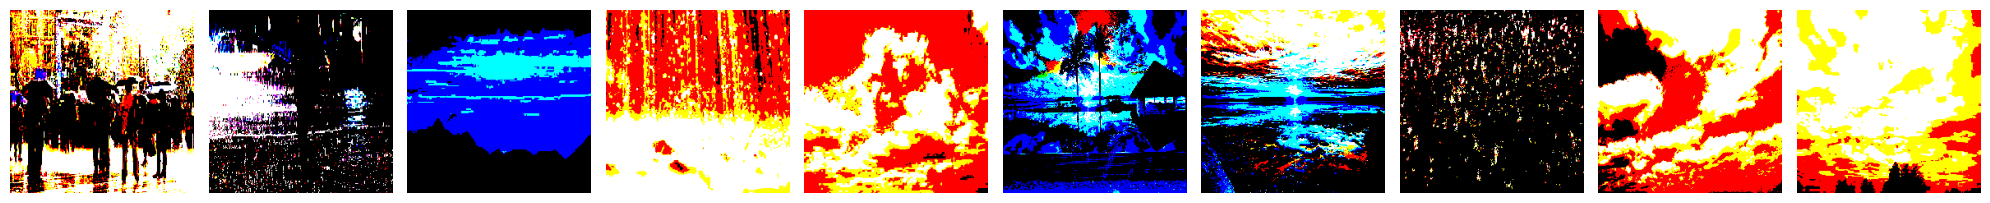

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0.

In [ ]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

In [ ]:
model=Sequential([
                  Conv2D(filters=16,kernel_size=(3,3),activation='tanh',padding='same',input_shape=(224,224,3)), #param=(3*3*3+1)*16
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),  #param=(3*3*16+1)*32
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=32,activation='softmax'), #param=size of flatten*4+4
                  Dense(units=4,activation='softmax'), #param=size of flatten*4+4
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,epochs=10,verbose=1)

Epoch 1/10
12/12 [==============================] - 68s 5s/step - loss: 0.6398 - accuracy: 0.5104
Epoch 2/10
12/12 [==============================] - 56s 4s/step - loss: 0.6212 - accuracy: 0.7195
Epoch 3/10
12/12 [==============================] - 58s 5s/step - loss: 0.6150 - accuracy: 0.8045
Epoch 4/10
12/12 [==============================] - 66s 5s/step - loss: 0.6102 - accuracy: 0.8534
Epoch 5/10
12/12 [==============================] - 70s 6s/step - loss: 0.6078 - accuracy: 0.8851
Epoch 6/10
12/12 [==============================] - 68s 5s/step - loss: 0.6060 - accuracy: 0.8968
Epoch 7/10
12/12 [==============================] - 71s 6s/step - loss: 0.6038 - accuracy: 0.9095
Epoch 8/10
12/12 [==============================] - 61s 5s/step - loss: 0.6017 - accuracy: 0.9357
Epoch 9/10
12/12 [==============================] - 72s 6s/step - loss: 0.6006 - accuracy: 0.9367
Epoch 10/10
12/12 [==============================] - 61s 5s/step - loss: 0.5990 - accuracy: 0.9403


In [ ]:
# from test folder importing pics

import cv2
test_img = cv2.imread('/content/drive/MyDrive/Dataset/Weather/Test/Shine/shine253.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(137, 367, 3)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_input = test_img.reshape((1,224,224,3))

In [ ]:
#predictions=model.predict(test_img)
predictions=model.predict(x=test_batches,verbose="auto")

2/2 [==============================] - 0s 60ms/step


In [ ]:
predictions


array([[0.3210025 , 0.1981253 , 0.26731414, 0.21355788],
       [0.23449995, 0.21566464, 0.19529751, 0.3545378 ],
       [0.23449995, 0.21566471, 0.19529752, 0.3545378 ],
       [0.23449995, 0.21566464, 0.19529751, 0.3545378 ],
       [0.33191824, 0.19332753, 0.2711057 , 0.20364861],
       [0.33333448, 0.19266543, 0.27158484, 0.20241527],
       [0.23449995, 0.21566464, 0.19529751, 0.3545378 ],
       [0.19696838, 0.2959536 , 0.22995299, 0.277125  ],
       [0.19730736, 0.29523286, 0.22969152, 0.27776828],
       [0.19696838, 0.2959536 , 0.22995299, 0.277125  ],
       [0.30792454, 0.2024492 , 0.26518258, 0.2244437 ],
       [0.2189973 , 0.22348563, 0.33443677, 0.22308025],
       [0.23449995, 0.21566471, 0.19529752, 0.3545378 ],
       [0.19696838, 0.2959536 , 0.22995299, 0.277125  ],
       [0.1969688 , 0.29595214, 0.22995508, 0.27712408]], dtype=float32)

In [ ]:
for [a,b,c,d] in predictions:
  ans = max(max(a,b),max(c,d))
  if(ans==a):
    print('Cloudy')
  elif(ans==b):
    print('Rain')
  elif(ans==c):
    print('Shine')
  elif(ans==d):
    print('Sunrise')



Cloudy
Sunrise
Sunrise
Sunrise
Cloudy
Cloudy
Sunrise
Rain
Rain
Rain
Cloudy
Shine
Sunrise
Rain
Rain


In [ ]:
imgs1,labels1=next(test_batches)

In [ ]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

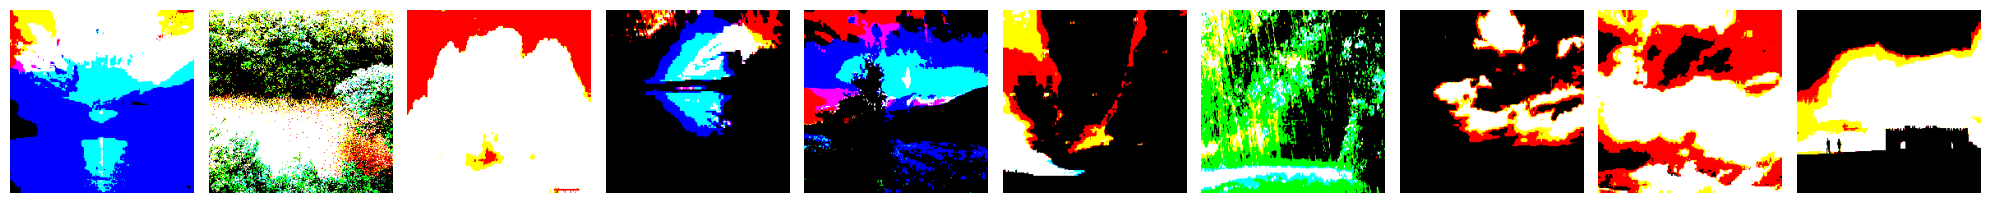

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
import matplotlib.pyplot as plt

plotImages(imgs1)
print(labels1)